In [1]:
#importação de bibliotecas
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
# settings
caminho = '~/ad/'
pd.set_option('display.max_columns', None)
pd.set_option('display.float_format', '{:.2f}'.format)

In [3]:
#carregando dados
df_viagens = pd.read_csv(caminho+'2024_Viagem.csv', encoding="Windows-1252", sep=';', decimal=',')
df_viagens

,Identificador do processo de viagem,Número da Proposta (PCDP),Situação,Viagem Urgente,Justificativa Urgência Viagem,Código do órgão superior,Nome do órgão superior,Código órgão solicitante,Nome órgão solicitante,CPF viajante,Nome,Cargo,Função,Descrição Função,Período - Data de início,Período - Data de fim,Destinos,Motivo,Valor diárias,Valor passagens,Valor devolução,Valor outros gastos
0,18831091,000011/24,Realizada,NÃO,Sem informação,26000,Ministério da Educação,26425,Instituto Federal do Acre,***.405.257-**,RICARDO DOS SANTOS PEREIRA,PROFESSOR ENS BASICO TECN TECNOLOGICO,-1,Sem informação,23/02/2024,25/02/2024,Rio Branco/AC,Ministrar a disciplina de Conceitos e Aplicaçõ...,929.18,0.00,0.00,0.00
1,18831495,000001/24,Realizada,NÃO,Sem informação,26000,Ministério da Educação,26274,Fundação Universidade Federal de Uberlândia,***.587.016-**,LETICIA SANCHEZ FERREIRA,PROFESSOR DO MAGISTERIO SUPERIOR,-1,Sem informação,18/01/2024,22/01/2024,São Paulo/SP,Participação nas atividades do ESTAGIO DE CAPA...,0.00,0.00,0.00,0.00
2,18831777,000002/24,Realizada,NÃO,Sem informação,26000,Ministério da Educação,26274,Fundação Universidade Federal de Uberlândia,***.587.016-**,LETICIA SANCHEZ FERREIRA,PROFESSOR DO MAGISTERIO SUPERIOR,-1,Sem informação,29/02/2024,04/03/2024,São Paulo/SP,Participação nas atividades do ESTAGIO DE CAPA...,0.00,0.00,0.00,0.00
3,18831821,000003/24,Realizada,NÃO,Sem informação,26000,Ministério da Educação,26274,Fundação Universidade Federal de Uberlândia,***.587.016-**,LETICIA SANCHEZ FERREIRA,PROFESSOR DO MAGISTERIO SUPERIOR,-1,Sem informação,11/04/2024,15/04/2024,São Paulo/SP,Participação nas atividades do ESTAGIO DE CAPA...,0.00,0.00,0.00,0.00
4,19177818,000001/24-1C,Realizada,SIM,Inclusão das diárias.,26000,Ministério da Educação,26271,Fundação Universidade de Brasília,***.626.601-**,VIRGINIA MARIA VASCONCELOS LEAL,PROFESSOR DO MAGISTERIO SUPERIOR,-1,Sem informação,29/01/2024,06/02/2024,"Lille/França, Paris/França",Programação dos eventos que a Professora irá p...,14176.38,6892.31,0.00,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
773085,2024001906,Sem informaçã,Realizada,NÃO,Sem informação,-1,Sem informação,-1,Sem informação,***.759.868-**,PAULO PICCHETTI,DIRETOR DO BANCO CENTRAL,-1,Sem informação,18/12/2024,19/12/2024,Sem informação,Cumprir agenda de trabalho em Brasília.,1109.09,3180.06,0.00,0.00
773086,2024001911,Sem informaçã,Realizada,NÃO,Sem informação,-1,Sem informação,-1,Sem informação,***.902.438-**,NAGEL LISANIAS PAULINO,ANALISTA DO BANCO CENTRAL,-1,Sem informação,16/12/2024,16/12/2024,Sem informação,"Participar, como palestrante, no evento '1 ano...",262.05,0.00,0.00,0.00
773087,2024001912,Sem informaçã,Realizada,NÃO,Sem informação,-1,Sem informação,-1,Sem informação,***.697.505-**,EDSON BROXADO DE FRANCA TEIXEIRA,ANALISTA DO BANCO CENTRAL,-1,Sem informação,17/12/2024,18/12/2024,Sem informação,Assessorar o Diretor de Fiscalização e cumprir...,1204.09,4044.69,0.00,0.00
773088,2024001946,Sem informaçã,Realizada,NÃO,Sem informação,-1,Sem informação,-1,Sem informação,***.425.230-**,GILNEU FRANCISCO ASTOLFI VIVAN,ANALISTA DO BANCO CENTRAL,-1,Sem informação,29/12/2024,31/12/2024,Sem informação,Suspensão das férias do servidor por motivo de...,0.00,5562.82,0.00,0.00


In [4]:
#criando nova coluna despesas
df_viagens['Despesas'] = df_viagens['Valor diárias'] + df_viagens['Valor passagens'] + df_viagens['Valor outros gastos']

In [5]:
#
df_viagens['Cargo'] = df_viagens['Cargo'].fillna('Não identificado')

In [6]:
#convertendo colunas de datas
df_viagens['Período - Data de início'] = pd.to_datetime(df_viagens['Período - Data de início'], format="%d/%m/%Y")
df_viagens['Período - Data de fim'] = pd.to_datetime(df_viagens['Período - Data de fim'], format="%d/%m/%Y")

In [7]:
#criando novas colunas de datas
df_viagens['Mês da viagem'] = df_viagens['Período - Data de início'].dt.month_name()
df_viagens['Dias de viagem'] = (df_viagens['Período - Data de fim'] - df_viagens['Período - Data de início']).dt.days


In [8]:
#criando tabela consolidada
df_viagens_consolidado = (df_viagens
                          .groupby('Cargo')
                          .agg(
                              despesa_media = ('Despesas', 'mean'),
                              duracao_media = ('Dias de viagem', 'mean'),
                              despesas_totais = ('Despesas', 'sum'),
                              destinos_mais_frequentes = ('Destinos', pd.Series.mode),
                              n_de_viagens = ('Nome', 'count')
                              )
                          .reset_index()
                          .sort_values(by='despesas_totais', ascending=False))


In [9]:
#filtrando tabela por cargos relevantes >1%
df_cargos = df_viagens['Cargo'].value_counts(normalize = True).reset_index()
cargos_relevantes = df_cargos.loc[df_cargos['proportion'] > 0.01, 'Cargo']
filtro = df_viagens_consolidado['Cargo'].isin(cargos_relevantes)

In [10]:
#chegando na tabela final
df_final = df_viagens_consolidado[filtro].sort_values(by = 'n_de_viagens', ascending = False)

In [11]:
#salvando tabela final
df_final.to_excel(caminho+'tabela_2024.xlsx', index = False)

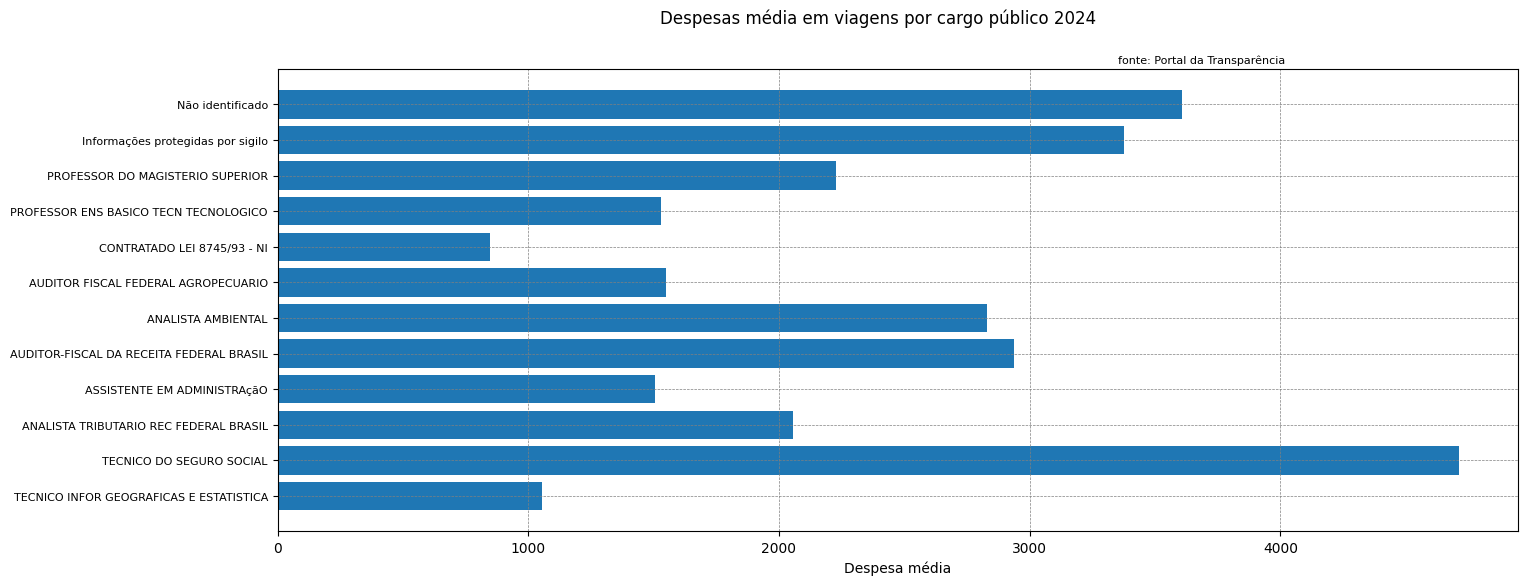

In [12]:
#criando figura
fig, ax = plt.subplots(figsize=(16, 6))

#plotando o gráfico
ax.barh(df_final['Cargo'], df_final['despesa_media'])
ax.invert_yaxis()

#ajustando o gráfico
fig.suptitle("Despesas média em viagens por cargo público 2024")
plt.figtext(0.65, 0.89, 'fonte: Portal da Transparência', fontsize=8)
plt.grid(color = "gray", linestyle = "--", linewidth = 0.5)
plt.yticks(fontsize = 8)
plt.xlabel('Despesa média')

# salvando o Gráfico
plt.savefig('/home/admti/ad/grafico_viagens_2024.png', bbox_inches = 'tight') 